In [1]:
import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice, OutputLoader
from superfv.initial_conditions import interacting_blast_wave_1d

In [2]:
N = 60
T = 0.038

ref_path = "../out/interacting_blast_wave_ref"

configs = {
    "ref": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        SED=True,
    ),
    "MUSCL-Hancock": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        p=1,
        MUSCL=True,
        MUSCL_limiter="moncen",
        SED=True,
    ),
    "MM2": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=2,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        limiting_vars="actives",
        NAD=True,
        absolute_dmp=False,
        NAD_rtol=1e-2,
        NAD_atol=1e-2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM4": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=4,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        limiting_vars="actives",
        NAD=True,
        absolute_dmp=False,
        NAD_rtol=1e-2,
        NAD_atol=1e-2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "MM8": dict(
        riemann_solver="hllc",
        flux_recipe=2,
        lazy_primitives=True,
        p=8,
        MOOD=True,
        cascade="muscl",
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        limiting_vars="actives",
        NAD=True,
        absolute_dmp=False,
        NAD_rtol=1e-2,
        NAD_atol=1e-2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

sims = {}
for name, config in configs.items():
    if name == "ref":
        try:
            sim = OutputLoader(ref_path)
            sims[name] = sim
            continue
        except FileNotFoundError:
            pass

    print(f"Running {name}...")
    sim = EulerSolver(
        ic=interacting_blast_wave_1d,
        bcx="reflective",
        nx=10000 if name == "ref" else N * (config["p"] + 1),
        **config,
    )

    try:
        path = ref_path if name == "ref" else None
        if config.get("MUSCL", False):
            sim.musclhancock(T, path=path, allow_overshoot=True, snapshot_mode="every")
        else:
            sim.run(T, q_max=2, path=path, allow_overshoot=True, snapshot_mode="every")
    except Exception as e:
        print(f"Failed: {e}")
        continue

    sims[name] = sim

Successfully read simulation output from "../out/interacting_blast_wave_ref"
Running MUSCL-Hancock...
Step #231 @ t=3.81e-02 | dt=1.98e-04 | min(rho)=1.54e-01, min(P)=1.78e+01 | (done)                  
Running MM2...
Step #353 @ t=3.81e-02 | dt=1.29e-04 | min(rho)=1.52e-01, min(P)=1.88e+01 | (done)                  
Running MM4...
Step #587 @ t=3.80e-02 | dt=7.82e-05 | min(rho)=1.49e-01, min(P)=1.89e+01 | (done)                  
Running MM8...
Step #1072 @ t=3.80e-02 | dt=4.26e-05 | min(rho)=1.47e-01, min(P)=1.91e+01 | (done)                 


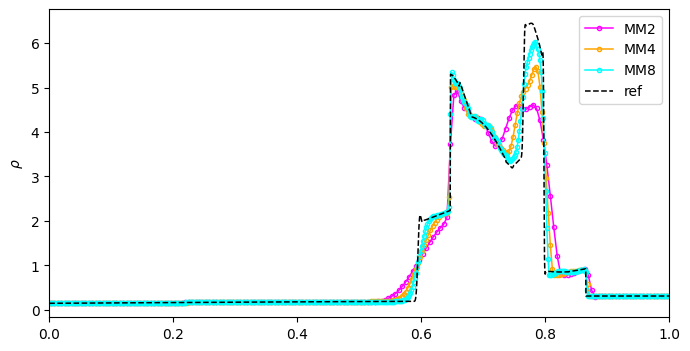

In [8]:
fig, ax = plt.subplots(1, figsize=(8, 4))

ax.set_ylabel(r"$\rho$")

for name, sim in sims.items():
    if name == "ref":
        continue
    if name == "MUSCL-Hancock":
        continue
    plot_1d_slice(
        sim,
        ax,
        "rho",
        label=name,
        color={2: "magenta", 4: "orange", 8: "cyan"}[sim.p],
        linewidth=1.1,
        markersize=3,
        marker="o",
        mfc="none",
    )

if "ref" in sims:
    simMH = sims["ref"]
    plot_1d_slice(
        simMH, ax, "rho", label=r"ref", color="k", linestyle="--", linewidth=1.1
    )

ax.set_xlim(0, 1)
ax.legend()